In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Getting some information about the dataset

In [8]:
data.shape

(301, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# checking the distribution of categorical data

In [18]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Label Encoding 

In [27]:
pd.set_option('future.no_silent_downcasting', True)
# Encoding "Fuel_Type" column
data.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace =True)
# Encoding "Seller_Type" column
data.replace({'Seller_Type': {'Dealer':0,'Individual':1}},inplace =True)
# Encoding "Transmission" column
data.replace({'Transmission': {'Manual':0,'Automatic':1}},inplace =True)

In [29]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Train and Test Split

In [38]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [40]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [42]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=2)

# Model Training 

# Linear Regression

In [49]:
# Linear Regression
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [53]:
# Model evaluation 
# prediction on training data
training_data_prediction = lin_reg.predict(X_train)

In [55]:
# R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.8799451660493716


In [64]:
# prediction on test data
training_data_prediction = lin_reg.predict(X_test)

In [66]:
# R Squared Error
error_score = metrics.r2_score(Y_test,training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.836576671502587


# Visualizing the actual & predicted prices

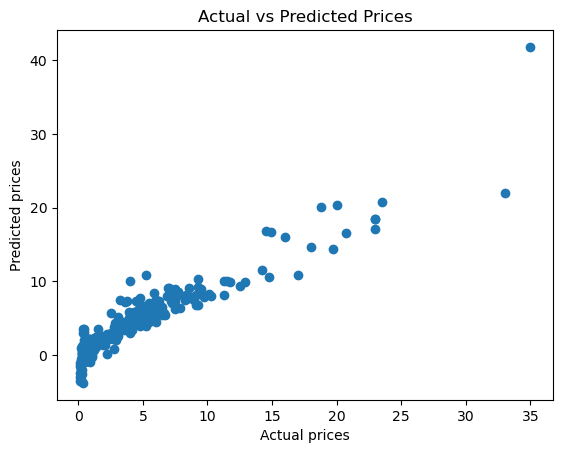

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')
plt.show()

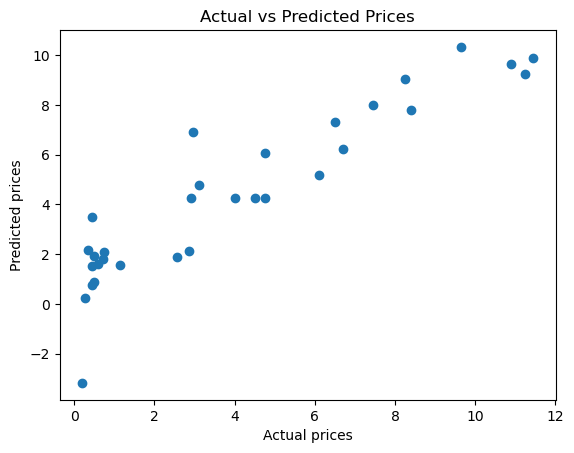

In [68]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Lasso Regression

In [75]:
# Lasso Regression
lasso_reg = Lasso()

In [77]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [79]:
# Model evaluation 
# prediction on training data
training_data_prediction = lasso_reg.predict(X_train)

In [81]:
# R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.8427856123435794


In [83]:
# prediction on test data
training_data_prediction = lasso_reg.predict(X_test)

In [85]:
# R Squared Error
error_score = metrics.r2_score(Y_test,training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.8709167941173195


# Visualizing the actual & predicted prices

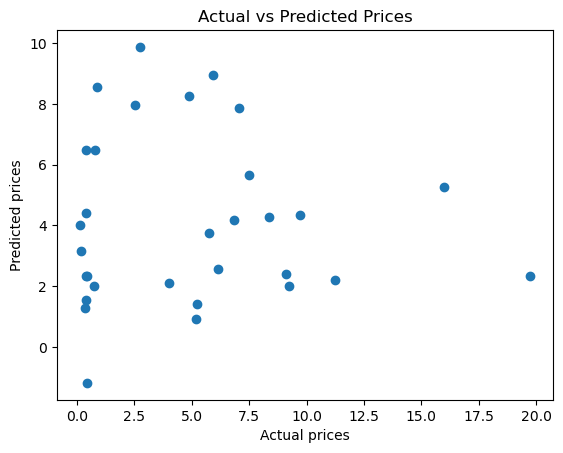

In [93]:
Y_train = Y_train[:len(training_data_prediction)]
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')
plt.show()

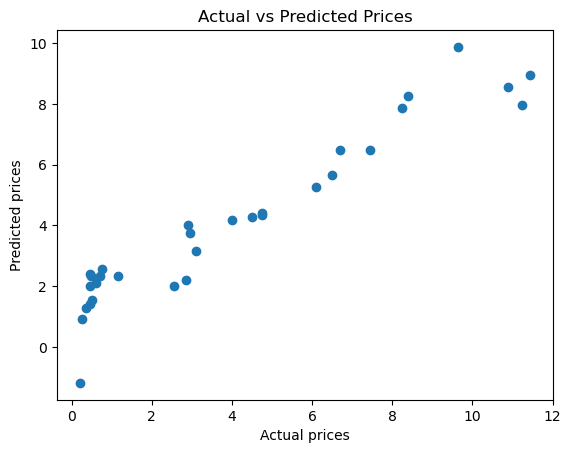

In [89]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [95]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [113]:
import numpy as np

# Example input with 7 features (adjust values to match your actual feature set)
input_data = np.array([[2018,6.00,3000,0,1,0,0]])

# Now predict with the trained model
prediction = lasso_reg.predict(input_data)
print(prediction)


[5.56612567]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
